<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 애플리케이션

ngrok 다운, ngrok.exe파일을 최상위 폴더로 옮겨준다.  
terminal창에 ngrok http 8000


In [ ]:
# gsweb/settings.py
ALLOWED_HOSTS = ["*"]

In [ ]:
# gsweb\templates\head.html
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

In [ ]:
    # articleapp/templates/articleapp/list.html
    <style>
        .container{
            padding: 0;
            margin: 0 auto;
        }
        .container div {
          width: 45%;
          background-color: lightseagreen;
          max-width: 250px;
            box-shadow: 0 0 .5rem cadetblue;
          display: flex;
          justify-content: center;
          align-items: center;
          border-radius: 1rem;
            flex-direction: column;
        }

In [ ]:
# static/js/magicgrid.js
let magicGrid = new MagicGrid({
  container: '.container',
  animate: true,
  gutter: 12,
  static: true,
  useMin: true
});


In [ ]:
# static/base.css
@media screen and(max-width: 500px){
    html{
        /* default font-size = 16px */
        font-size: 13px;
    }
}

terminal  
python manage.py startapp projectapp  

In [ ]:
# gsweb/settings.py
    'projectapp',

# gsweb/urls.py
    path('projects/', include('projectapp.urls')),

# 4. 머신러닝

In [ ]:
!pip install mglearn

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

#### Random Forest 실습 02

붓꽃 데이터 랜덤포레스트를 만들기

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, max_features=1,
                              #  max_depth=2,
                               random_state=0)
model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.9333333333333333)

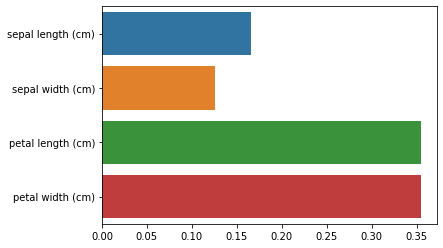

In [ ]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=iris.feature_names)

##### 랜덤포레스트 성능향상

- iris 데이터가 간단하고 size가 작기 때문에 성능향상은 없으나 max_features와 oob_score를 적용해 보고 
- 특성 중요도의 변화를 확인해 본다.


oob_score

- 샘플링에 중복을 허용하는 배깅(Bagging) 방식을 사용하면 어떤 샘플은 여러번 샘플링되고 어떤 것은 전혀 선택되지 않을 수 있음
- 평균적으로 각 예측기에 훈련 샘플의 63% 정도만 샘플링
- oob(out-of-bag) : 선택되지 않은 훈련 샘플의 나머지 37% <br>
(예측기 마다 남겨진 37%는 모두 다름)
- oob_score=True로 지정하면 훈련이 끝난 후 자동으로 oob 샘플을 사용해 평가를 수행 

0.9666666666666667
0.95
0.9333333333333333
OOB 샘플의 결정 함수값: [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.09041793e-01 8.90958207e-01]
 [0.00000000e+00 7.25065957e-02 9.27493404e-01]
 [8.91431427e-01 3.90119226e-02 6.95566502e-02]
 [9.63220612e-01 2.34460548e-02 1.33333333e-02]
 [0.00000000e+00 6.87817670e-02 9.31218233e-01]
 [2.29104229e-02 7.66288460e-02 9.00460731e-01]
 [2.14199000e-02 1.49274104e-01 8.29305996e-01]
 [8.58395062e-01 1.11750842e-01 2.98540965e-02]
 [1.92363531e-03 4.94105188e-01 5.03971176e-01]
 [3.24404762e-02 9.00767785e-01 6.67917389e-02]
 [0.00000000e+00 4.20409744e-02 9.57959026e-01]
 [9.88980716e-01 0.00000000e+00 1.10192837e-02]
 [5.55555556e-03 5.12588688e-01 4.81855757e-01]
 [1.00840336e-02 8.41931892e-02 9.05722777e-01]
 [2.66416510e-02 8.82043593e-01 9.13147564e-02]
 [3.01504122e-02 7.13709276e-01 2.56140311e-01]
 [9.86270023e-01 1.37299771e-02 0.00000000e+00]
 [0.00000000e+00 7.55283334e-02 9.24471667e-01]
 [1.00000000e+00 0.00000000e+

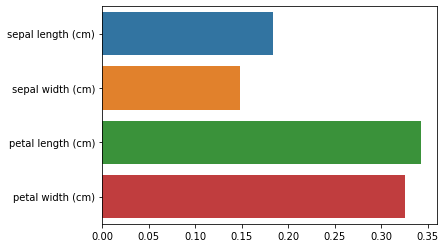

In [ ]:
# 모델 학습
model = RandomForestClassifier(max_features=1, max_depth=3,
                               bootstrap=True, oob_score=True,
                               random_state=0)
model.fit(X_train, y_train)

# 평가
print(model.score(X_train, y_train))
print(model.oob_score_)
print(model.score(X_test, y_test))

# 결정함수는 각 훈련 샘플의 클래스 확률을 반환 
# (predict_proba()가 기반이 되는 예측기 모델에 존재하기 때문)
print("OOB 샘플의 결정 함수값:" , model.oob_decision_function_)

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=iris.feature_names)

#### 장단점

- 결정트리의 단점을 보완하고 장점은 그대로 가지고 있는 모델이어서 별다른 조정 없이도 괜찮을 결과를 만들어낸다.
- 트리가 여러 개 만들어지기 때문에 비전문가에게 예측과정을 보여주기는 어렵다.
- 랜덤하게 만들어지기 때문에 random_state를 고정해야 같은 결과를 볼 수 있다.
- 텍스트 데이터와 같은 희소한 데이터에는 잘 동작하지 않는다.
- 큰 데이터 세트에도 잘 동작하지만 훈련과 예측이 상대적으로 느리다.
- 트리 개수가 많아질 수록 시간이 더 오래 걸린다.


# Bagging

- 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킴

- 분류기가 predict_proba() 메소드를 지원하는 경우 확률값을 평균하여 예측을 수행

- 없는 경우 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# oob_score : 부스트래핑에 포함되지 않는 샘플을 기반으로 훈련된 모델을 평가
model_bagging = BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                                  oob_score=True,
                                  random_state=0)
model_bagging.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
print(model_bagging.score(X_train,y_train))
print(model_bagging.score(X_test,y_test))
print(model_bagging.oob_score_)

0.9577464788732394
0.951048951048951
0.9366197183098591


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=7),
                                  max_features=11, 
                                  oob_score=True,
                                  random_state=0)
model_bagging.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
print( model_bagging.score(X_train, y_train) )
print( model_bagging.score(X_test, y_test) )
print( model_bagging.oob_score_ )

0.9976525821596244
0.9370629370629371
0.9295774647887324


In [ ]:
# 특성 중요도 시각화: 결정트리만 지원
import seaborn as sns
model_bagging.estimators_[0].feature_importances_

array([0.01931292, 0.00670697, 0.10417186, 0.        , 0.01743813,
       0.01341394, 0.03580703, 0.03084324, 0.64269048, 0.03407168,
       0.09554376])

#### Bagging 실습 01

결정트리로 배깅을 수행 (two_moon 데이터 셋 적용)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
# BaggingClassifier 모델 학습
# n_estimators=5
from sklearn.tree import DecisionTreeClassifier
model_bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=16), 
                                  n_estimators=3,
                                  random_state=0)
model_bagging.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
model_bagging.score(X_train, y_train), model_bagging.score(X_test, y_test)
# print( model_bagging.oob_score_ )

(0.9866666666666667, 0.92)

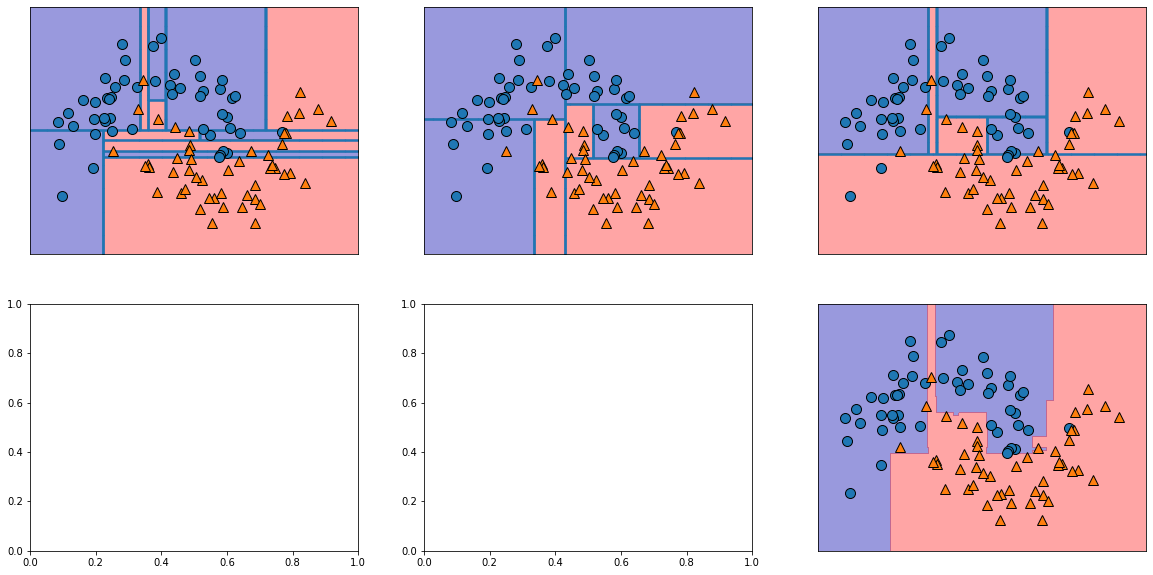

In [ ]:
import matplotlib.pyplot as plt
import mglearn

# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for tree, ax in zip(model_bagging.estimators_, axes.ravel()):
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# 배깅으로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model_bagging, X, ax=axes[-1, -1], fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

- n_estimator=100으로 설정한 경우

In [ ]:
# BaggingClassifier 모델 학습
# n_estimator=100으로 설정한 경우

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
model_bagging = BaggingClassifier(DecisionTreeClassifier(), 
                                  n_estimators=100, max_samples=70,
                                  oob_score=True,
                                  random_state=0)
model_bagging.fit(X_train, y_train)

# 평가
# 훈련, 테스트, OOB 샘플의 정확도
print( model_bagging.score(X_train, y_train) )
print( model_bagging.score(X_test, y_test) )
print( model_bagging.oob_score_ )

1.0
0.92
0.8266666666666667


- 배깅은 랜덤포레스트와 달리 max_samples 매개변수에서 부스트랩 샘플의 크기를 지정할 수 있음
- 랜덤포레스트는 DecisionTreeClassifier(splitter='best')를 사용하도록 고정되어 있음
- 결정트리를 splitter='random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음

# Extra Tree

- 랜덤포레스트와 비슷하지만 최적의 임계값을 찾는 대신 후보 특성을 사용해 무작위로 분할한 다음 그중에서 최상의 분할을 선택
- 극단적으로 무작위한 트리의 랜덤 포레스트를 익스트림 랜덤 트리(extremely randomized tree) 또는 줄여서 엑스트라 트리(extra-tree)라고 부름

- 부스트랩 샘플링은 적용하지 않음

- 예측방식은 랜덤포래스트와 동일하게 각 트리가 만든 확률값을 평균

In [ ]:
# ExtraTreesClassifier 모델 학습
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100, n_jobs=2, random_state=0)
model.fit(X_train, y_train)

# 평가
print( model.score(X_train, y_train) )
print( model.score(X_test, y_test) )
# print( model.oob_score_ )

1.0
0.92


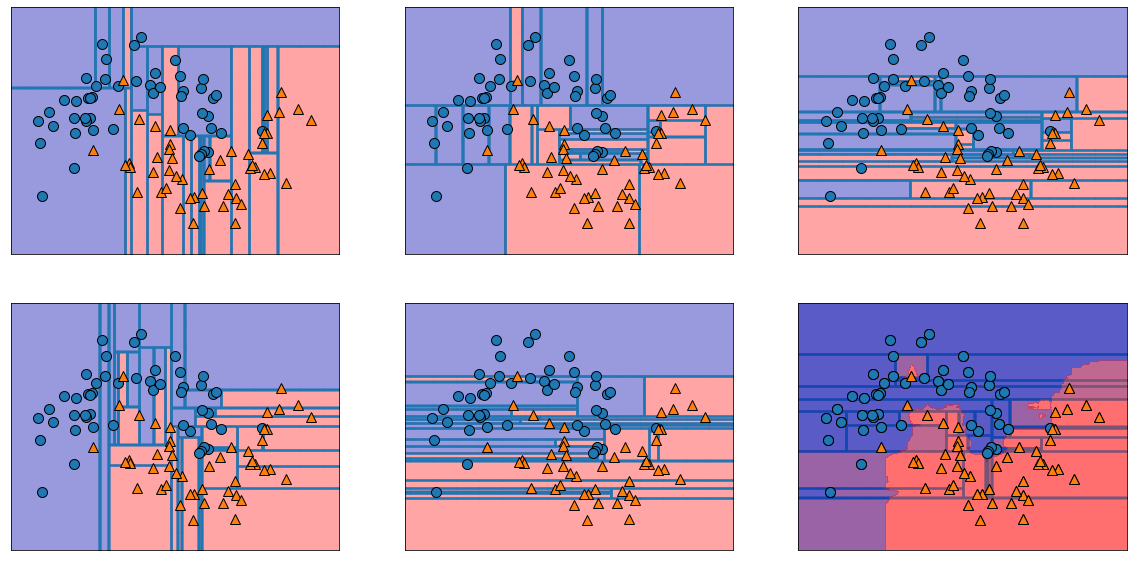

In [ ]:
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for tree, ax in zip(model.estimators_, axes.ravel()):
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# 배깅으로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, X, ax=axes[-1, -1], fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#### Extra Tree 실습 01

n_estimator=100으로 설정한 경우 (유방암 데이터 세트에 적용)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

In [ ]:
# ExtraTreesClassifier 모델 학습
model = ExtraTreesClassifier(n_estimators=30,max_depth=8, random_state=0)
model.fit(X_train, y_train)

# 평가
print( model.score(X_train, y_train) )
print( model.score(X_test, y_test) )
# print( model.oob_score_ )

0.9953051643192489
0.972027972027972


- 엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 냄

- 엑스트라 트리는 계산 비용이 적지만 무작위 분할 때문에 일반화 성능을 높이려면 많은 트리가 필요하다는 문제

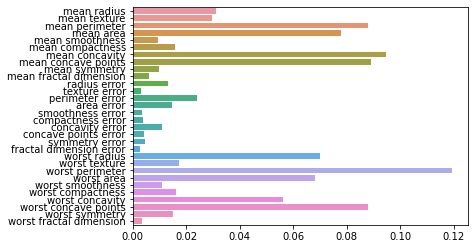

In [ ]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)